# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

Text(0.5, 1.0, 'Reflexión vertical')

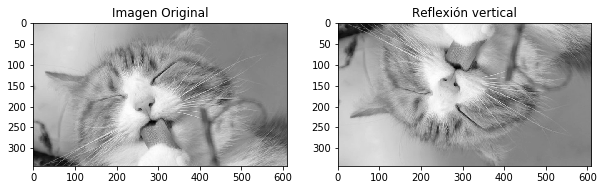

In [33]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")


[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


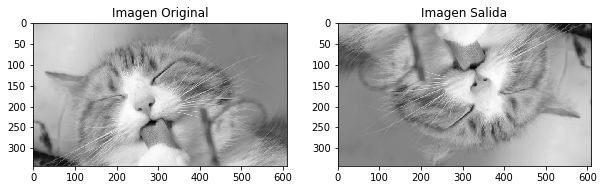

In [28]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen con rotación");

Text(0.5, 1.0, 'Reflexión horizontal')

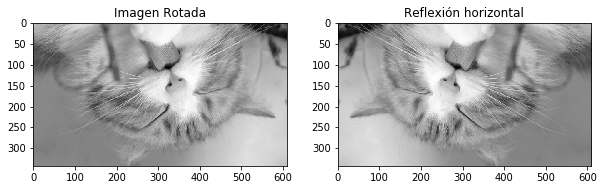

In [32]:

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Rotada")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")


Text(0.5, 1.0, 'Imagen Salida')

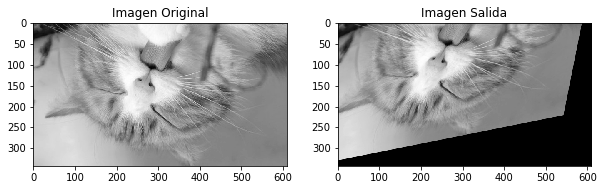

In [34]:
#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
inc = cv2.warpAffine(ref_x,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(ref_x,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(inc,cmap='gray')
plt.title("Imagen Salida")

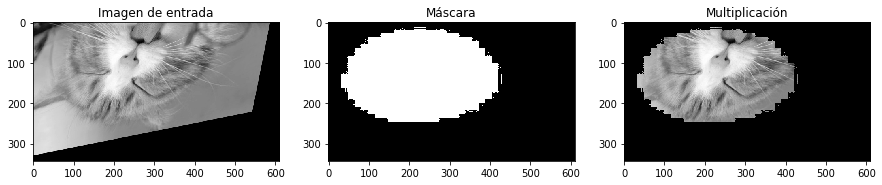

In [35]:
#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(inc, mascara)

#Figura 1x3 para mostrar imagen de entrada, máscara y la multiplicación
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(inc, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


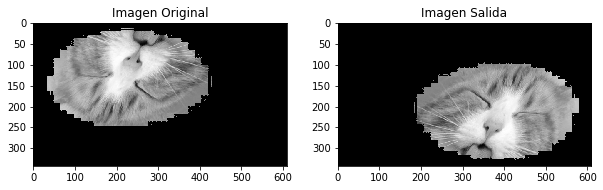

In [36]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot2 = cv2.warpAffine(out,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(out,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot2,cmap='gray')
plt.title("Imagen Salida");